## Name-Soumyajit Saha

## Date-19/10/22

## Sparks Foundation Internship

### Task-1 - Prediction of percentage of a student on the number of study hours (supervised ML).

#### Description of the Task- 
We have to predict the percentage of a student based on the number of study hours.As a result we have to bulid a regression model which will predict the percentage of a student on the number of study hours. 
Here Scores refers to the percentage of marks obtained by the student and Hours refers to the number of hours a student studies in a day.

We first load the data set for our work and then read the dataset.

loading the data 

In [7]:
data<-read.csv('http://bit.ly/w-data',header=T)

Now we have to know about the data to do the Analysis or Prediction.

In [9]:
dim(data)#the dimensions of the dataset.
head(data)#a brief preview of the dataset.
names(data)#column names of the dataset.
summary(data)##summary of the data

[1] 25  2

,Hours,Scores
,<dbl>,<int>
1,2.5,21
2,5.1,47
3,3.2,27
4,8.5,75
5,3.5,30
6,1.5,20


[1] "Hours"  "Scores"

     Hours           Scores     
 Min.   :1.100   Min.   :17.00  
 1st Qu.:2.700   1st Qu.:30.00  
 Median :4.800   Median :47.00  
 Mean   :5.012   Mean   :51.48  
 3rd Qu.:7.400   3rd Qu.:75.00  
 Max.   :9.200   Max.   :95.00  

Now we plot scatterplot of the data to observe if there's any visible correlation between the variables Scores and Hours. Plotting the distribution of the scores.

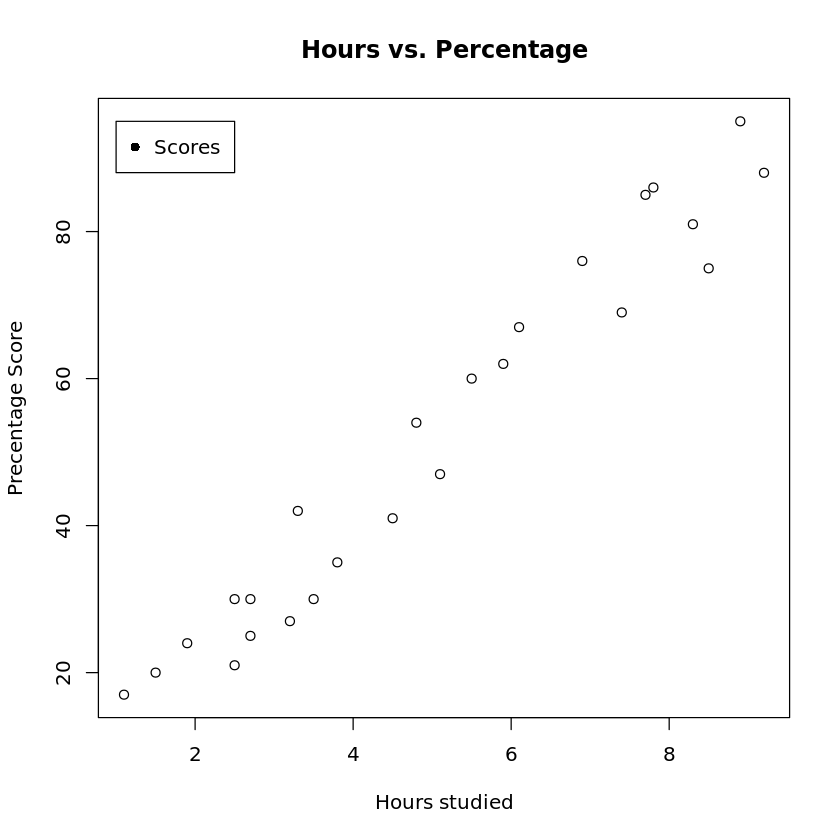

In [3]:
plot(data$Hours,data$Scores,
     xlab="Hours studied",ylab="Precentage Score",
     main="Hours vs. Percentage")
legend(x=1,y=95,'Scores',pch=16)


From the scatterplot we can see that  the relation between the number of hours studied and percentage of score is  linear. 
Based on the observations from the scatterplot we proceed to fit a linear regression model.

In [10]:
## The linear regression model:

##Now,we divide the data into two parts randomly- referring one to train data and the other to test data. 
##We divide the data into 4:1 ratio.That is 80% data for traing set and 20% data for test set to get the better predictions.
x=data$Hours ; y=data$Scores 
rsample=sample(nrow(data),floor(0.8*nrow(data)),replace=F)
xtrain=x[rsample];ytrain=y[rsample]
xtest=x[-rsample];ytest=y[-rsample]
##Now we have to fit a linear regression model to the train data:
model=lm(ytrain~xtrain,data=data)
summary(model)


Call:
lm(formula = ytrain ~ xtrain, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-8.104 -5.200  2.047  4.108  7.564 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.09355    2.63565   0.035    0.972    
xtrain      10.40675    0.49248  21.131 3.72e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.168 on 18 degrees of freedom
Multiple R-squared:  0.9613,	Adjusted R-squared:  0.9591 
F-statistic: 446.5 on 1 and 18 DF,  p-value: 3.718e-14


With the help of R, the linear regression model has come out to be :
      Scores=4.2368  +9.4280Hours
the value of Adjusted R-squared for the above regression model is 0.9429  which is high.
That is, the above linear regression model explains  the total variation in Scores due to the number of hours of studying by a student very well. 
Since the Adjusted R-squared is very high we can say that the fit is good.

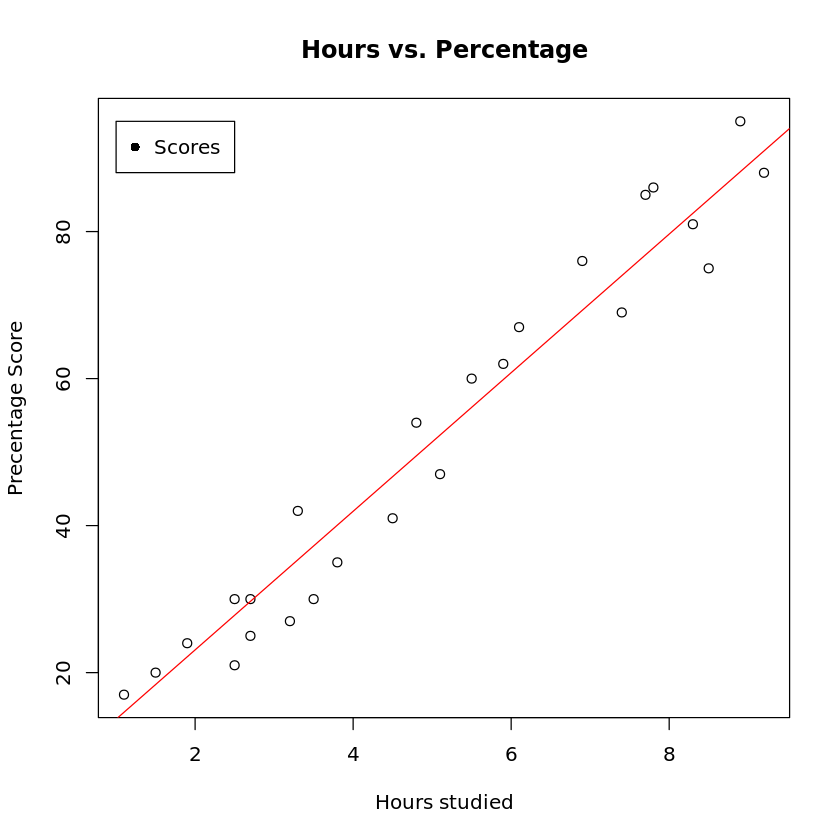

In [9]:
##ploting of the fitted model with the scatterplot of the data set 
plot(data$Hours,data$Scores,
     xlab="Hours studied",ylab="Precentage Score",
     main="Hours vs. Percentage")
legend(x=1,y=95,'Scores',pch=16)
abline(model,col="red")

Here the redline is the regression line which is passes through the data points.
Now we test this model on our test data.
Now its time to make comparison between the observed vales for test data set and predicted values on test data set using the linear model.

In [10]:
ypred=predict(model,newdata=data.frame(xtrain=xtest))
ypred
df=data.frame("Hours"=xtest,"Actual Score"=ytest,"Predicted Score"=ypred)
df

1        2        3        4        5 
37.23490 90.97462 76.83259 88.14622 40.06330

,Hours,Actual.Score,Predicted.Score
,<dbl>,<int>,<dbl>
1,3.5,30,37.23490
2,9.2,88,90.97462
3,7.7,85,76.83259
4,8.9,95,88.14622
5,3.8,35,40.06330


from the above table we can see that the difference between actual/observed values and the Predicted values using the linera model is less.
so we can say that our linear model is not bad in the context of prediction.
Now we have to predict the score of a student who studied for 9.25 hrs.

In [11]:
pred=predict(model,newdata=data.frame(xtrain=9.25))
x=data.frame("Hours"=9.25,"Predicted Score"=pred)
x

,Hours,Predicted.Score
,<dbl>,<dbl>
1,9.25,91.44602


That is, if a student studies 9.5 hours per day then he/she can be expected to score approximately 91.44% in the exam.

With that the first task of my data science and business analytics internship is completed.